<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Klasterizacija_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasterizacija

Zadatak: Primeniti K - Means algoritam, analizirati dobijene rezultate i pokazati neke od zavisnosti izmedju atributa

Algoritmi koje treba primeniti:
- K - Means,
- Algoritam za hijerarhijsku klasterizaciju



---



In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



---



# K - Means algoritam

## Obrada podataka

Prikaz podataka:

In [64]:
try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Mall_Customers/Mall_Customers.csv -O Mall_Customers.csv
except:
  print("An exception occurred")

data = pd.read_csv("Mall_Customers.csv")

data

--2025-06-29 21:58:30--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Mall_Customers/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3772 (3.7K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.68K  --.-KB/s    in 0s      

2025-06-29 21:58:30 (14.5 MB/s) - ‘Mall_Customers.csv’ saved [3772/3772]



,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18




---



### Brisanje tekstualnih vrednosti

Izbacivanje String (tekstualnih) vrednost:

In [65]:
# Izbacivanje atributa tako da su svi preostali atributi realni brojevi.
data.drop(columns="Gender", inplace=True)

print(data.head())
print(data.describe())

   CustomerID  Age  Annual Income (k$)  Spending Score
0           1   19                  15              39
1           2   21                  15              81
2           3   20                  16               6
3           4   23                  16              77
4           5   31                  17              40
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000




---



### Skaliranje podataka

Skaliranje podataka pre primene K - Means algoritma je ključno za dobijanje tačnijih i pouzdanijih rezultata, posebno kada se koriste različite karakteristike sa različitim opsezima vrednosti. Ovo pomaže u postizanju pravednog odnosa svake karakteristike prilikom klasterovanja i omogućava algoritmu da ispravno identifikuje slične grupe unutar podataka.

Skaliranje podataka tako da se svaki atribut preslikava u opseg 0 - 1

In [66]:
mms = MinMaxScaler()

mms.fit(data)

data_transformed = mms.transform(data)
data_transformed_df = pd.DataFrame(data_transformed, columns=data.columns)

print(data_transformed_df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score
count   200.00000  200.000000          200.000000      200.000000
mean      0.50000    0.400962            0.373443        0.502041
std       0.29085    0.268635            0.215285        0.263505
min       0.00000    0.000000            0.000000        0.000000
25%       0.25000    0.206731            0.217213        0.344388
50%       0.50000    0.346154            0.381148        0.500000
75%       0.75000    0.596154            0.516393        0.734694
max       1.00000    1.000000            1.000000        1.000000




---



## Vizuelni prikaz podataka

Vizuelni prikaz odnosa izmedju plate i skora potrosnje:

Text(0, 0.5, 'Spending Score')

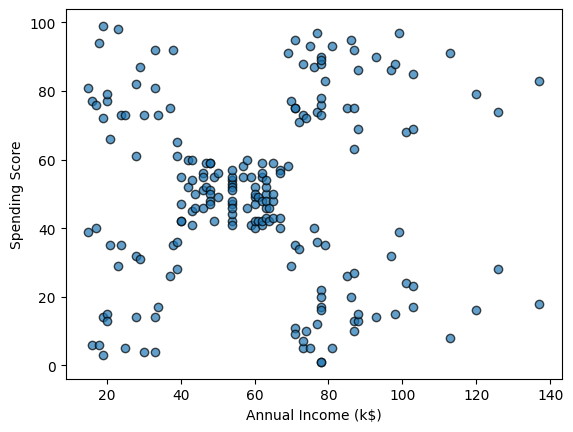

In [69]:
plot.scatter(data['Annual Income (k$)'], data['Spending Score'], alpha=0.7, edgecolors='black')
plot.xlabel('Annual Income (k$)')
plot.ylabel('Spending Score')



---



## Metoda Lakta

Metoda lakta (_eng. Elbow method_) sluzi za pronalazenje optimalnog broja klastera.

In [70]:
# Isprobava se klasterizacija sa brojem klastera K od 1 do 10.

k_range = range(1, 10)
sse = []
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(data[['Annual Income (k$)', 'Spending Score']])
  sse.append(km.inertia_)

sse

[269981.28000000014,
 184609.98434090626,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38527.34201969527,
 31902.83386816671,
 25355.490610835586,
 22886.282178932186]

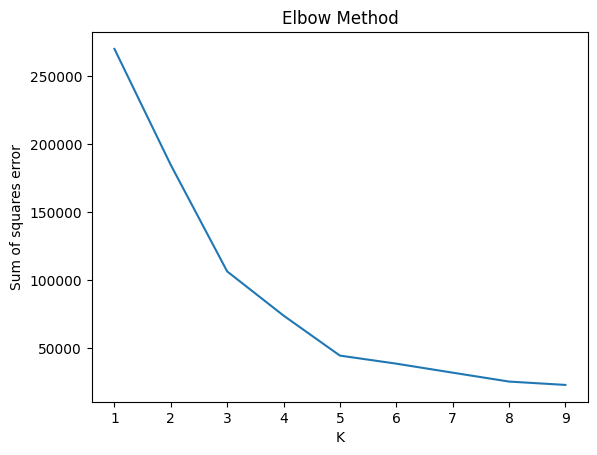

In [71]:
# Iscrtava se grafik sume kvadrata rastojanja
# (elemenata svakog od klastera do odgovarajućeg centroida).

plot.title('Elbow Method')
plot.xlabel('K')
plot.ylabel('Sum of squares error')
plot.plot(k_range, sse)



---



## Kreiranje i treniranje modela

Broj klastera (Kreiranje K Means modela):

In [72]:
# Za optimalni broj klastera uzima se 5 jer tu prethodna kriva ima "lakat", tj.
# za veće vrednosti K se ne dobija značajno poboljšanje.
# Parametar n_init=10 određuje broj ponavljanja algoritma sa različitim početnim centroidima
# izabranim na slučajan način.

# Kreiranje modela K - Means algoritma nakon skaliranja
# Ovde se kreira novi model sa prethodno određenim brojem klastera korišćenjem metode lakta

km = KMeans(n_clusters=5, n_init=10, random_state=11)
km.fit(data_transformed)

KMeans(n_clusters=5, n_init=10, random_state=11)

Ispis rednog broja klastera za svaki red

In [73]:
y_predicted = km.fit_predict(data[['Annual Income (k$)', 'Spending Score']])
y_predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Dodaje se nova kolona koja oznacava redni broj za svaki red/podatak.

Nakon definisanja broja klastera (K), potrebno je svaku tačku podataka (red u tabeli) dodeliti u najbliži klaster. Svaka tačka podataka treba pripadati najbližem klasteru koji može biti 0, 1, 2, 3 ili 4.

In [75]:
data['Cluster'] = y_predicted
#data.drop('cluster', axis='columns', inplace=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score,Cluster
0,1,19,15,39,0
1,2,21,15,81,4
2,3,20,16,6,0
3,4,23,16,77,4
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,3
197,198,32,126,74,1
198,199,32,137,18,3


Centroidi:

In [76]:
# Ispis svih centroida, i njihove pozicija na grafikonu (2D prostoru)
# centroidi (x, y)
# km.cluster_centers_

for i, centroid in enumerate(km.cluster_centers_):
    print(f"Centroid {i}: {centroid}")

Centroid 0: [26.30434783 20.91304348]
Centroid 1: [86.53846154 82.12820513]
Centroid 2: [55.2962963  49.51851852]
Centroid 3: [88.2        17.11428571]
Centroid 4: [25.72727273 79.36363636]




---



## K - Means klasterizacija:

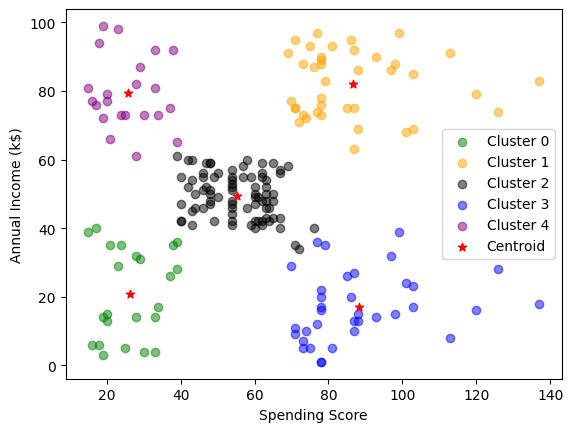

In [77]:
# Prikaz različitih klastera u 2D.

df0 = data[data.Cluster == 0]
df1 = data[data.Cluster == 1]
df2 = data[data.Cluster == 2]
df3 = data[data.Cluster == 3]
df4 = data[data.Cluster == 4]

plot.scatter(df0['Annual Income (k$)'], df0['Spending Score'], color='green', label = 'Cluster 0', alpha=0.5)
plot.scatter(df1['Annual Income (k$)'], df1['Spending Score'], color='orange', label = 'Cluster 1', alpha=0.5)
plot.scatter(df2['Annual Income (k$)'], df2['Spending Score'], color='black', label = 'Cluster 2', alpha=0.5)
plot.scatter(df3['Annual Income (k$)'], df3['Spending Score'], color='blue', label = 'Cluster 3', alpha=0.5)
plot.scatter(df4['Annual Income (k$)'], df4['Spending Score'], color='purple', label = 'Cluster 4', alpha=0.5)

plot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color='red', marker='*', label='Centroid') # [:, 0] - : oznacava sve redove, 0 oznacava 0. kolonu

plot.xlabel('Spending Score')
plot.ylabel('Annual Income (k$)')
plot.legend()
plot.show()



---



## Analiza rezultata

Analiza dobijenih klastera:

In [92]:
print(f"Cluster0: \n {df0.describe()}")
print(f"\nCluster1: \n {df1.describe()}")
print(f"\nCluster2: \n {df2.describe()}")
print(f"\nCluster3: \n {df3.describe()}")
print(f"\nCluster4: \n {df4.describe()}")

Cluster0: 
        CustomerID        Age  Annual Income (k$)  Spending Score  Cluster
count    23.00000  23.000000           23.000000       23.000000     23.0
mean     23.00000  45.217391           26.304348       20.913043      0.0
std      13.56466  13.228607            7.893811       13.017167      0.0
min       1.00000  19.000000           15.000000        3.000000      0.0
25%      12.00000  35.500000           19.500000        9.500000      0.0
50%      23.00000  46.000000           25.000000       17.000000      0.0
75%      34.00000  53.500000           33.000000       33.500000      0.0
max      45.00000  67.000000           39.000000       40.000000      0.0

Cluster1: 
        CustomerID        Age  Annual Income (k$)  Spending Score  Cluster
count   39.000000  39.000000           39.000000       39.000000     39.0
mean   162.000000  32.692308           86.538462       82.128205      1.0
std     22.803509   3.728650           16.312485        9.364489      0.0
min    124.00